In [1]:
# !conda install -c bioconda seqkit
# !pip3 install biopython
# This 2.0 version of the telo boundary script will use a slightly more advanced algorithm to identify 
# the telomere boundary. The algorithm will in effect look for a discontinuity in the telomere pattern, 
# marking the point where the sequence changes from telomere to non-telomere as the boundary. 

from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import re
import matplotlib.pyplot as plt
from TeloBP import *
import constants as c

chr01q
graphAreaWindowSize: 20
3120
second show graph called


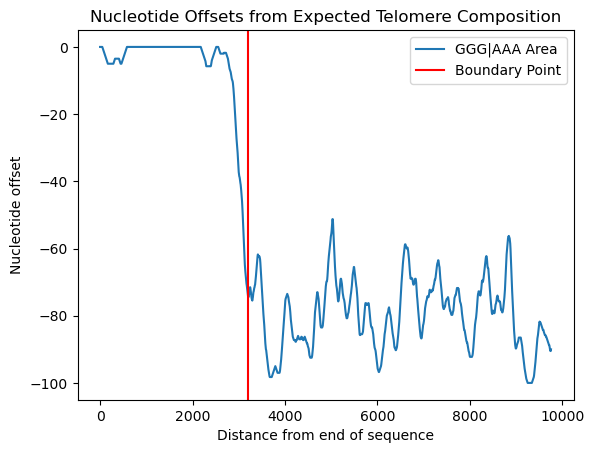

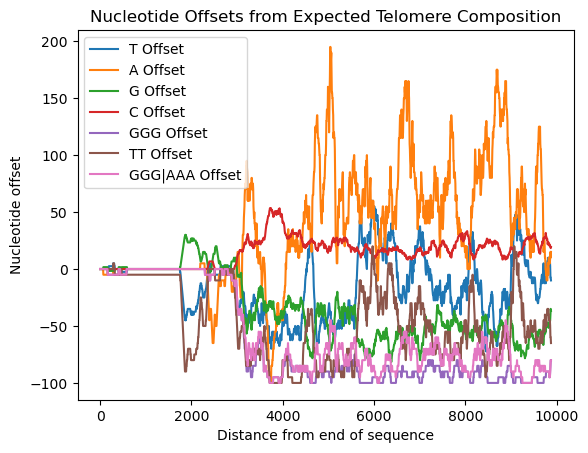

q returning  3204
q end: 3204
Error: chromosome not found in dictionary, returning 0
chr02q
graphAreaWindowSize: 20
2538
second show graph called


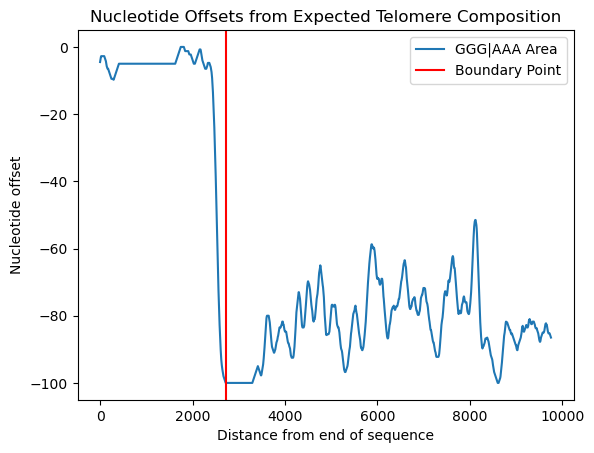

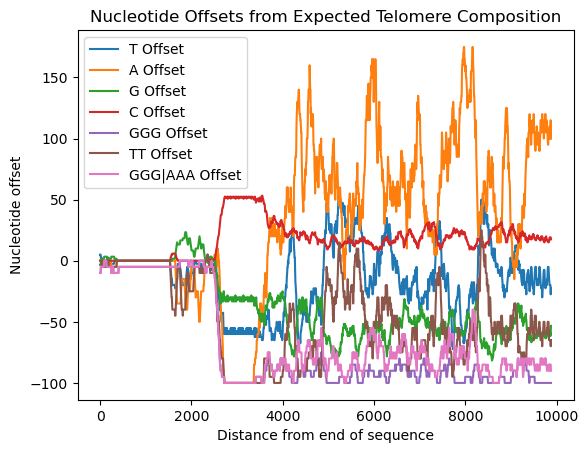

q returning  2718
q end: 2718
Error: chromosome not found in dictionary, returning 0
chr03q
graphAreaWindowSize: 20
4542
second show graph called


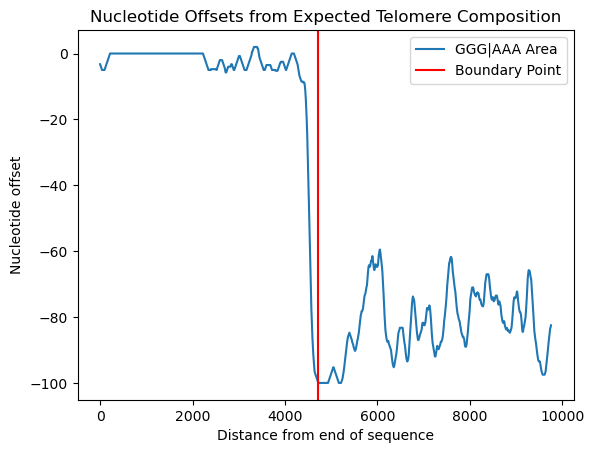

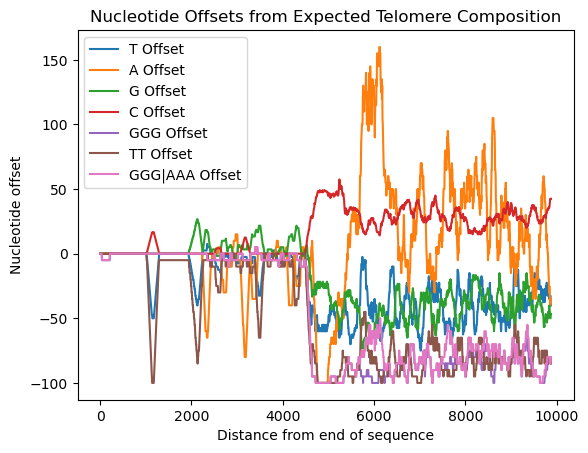

q returning  4722
q end: 4722
Error: chromosome not found in dictionary, returning 0
chr04q
graphAreaWindowSize: 20
2226
second show graph called


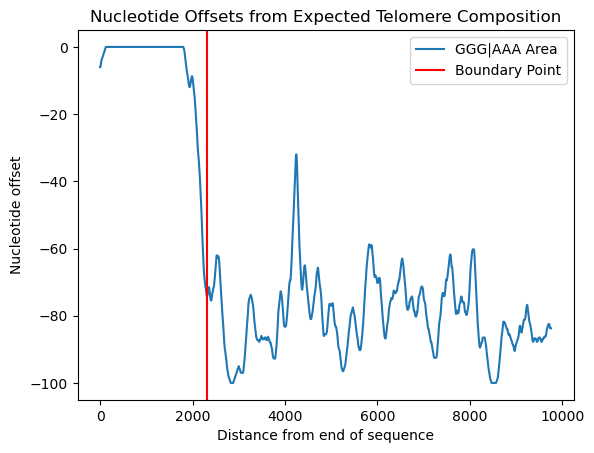

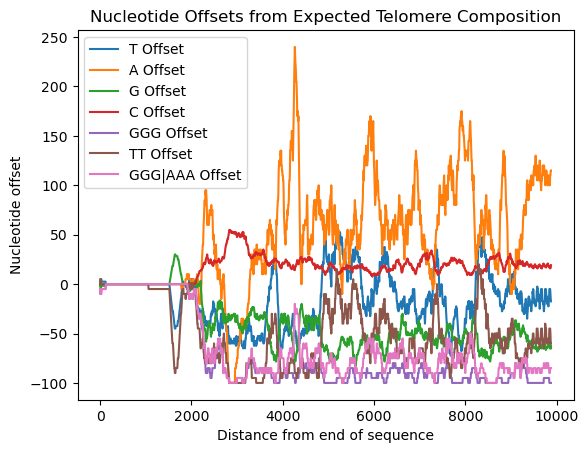

q returning  2310
q end: 2310
Error: chromosome not found in dictionary, returning 0
chr05q
graphAreaWindowSize: 20
1458
second show graph called


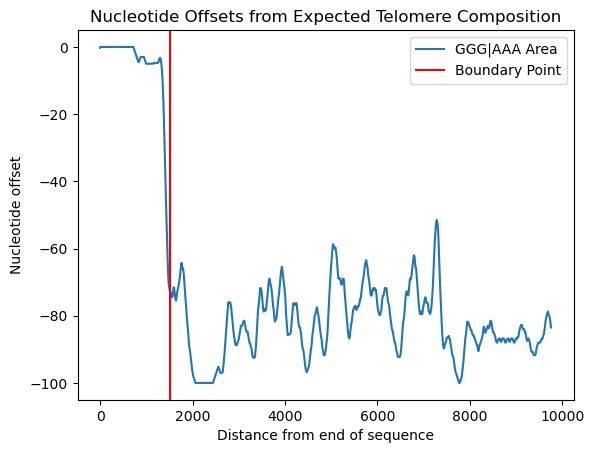

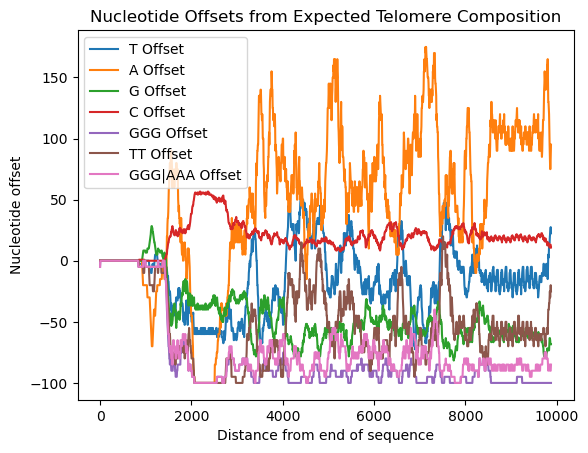

q returning  1518
q end: 1518
Error: chromosome not found in dictionary, returning 0
chr06q
graphAreaWindowSize: 20
2682
second show graph called


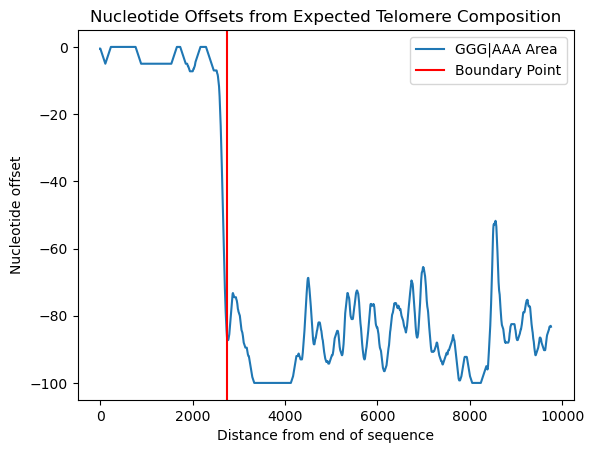

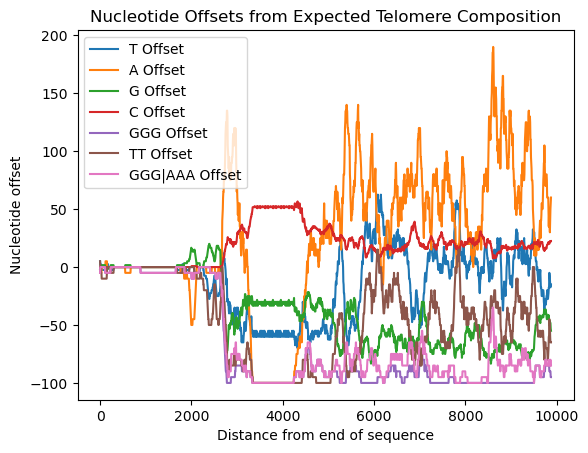

q returning  2754
q end: 2754
Error: chromosome not found in dictionary, returning 0
chr07q
graphAreaWindowSize: 20
2118
second show graph called


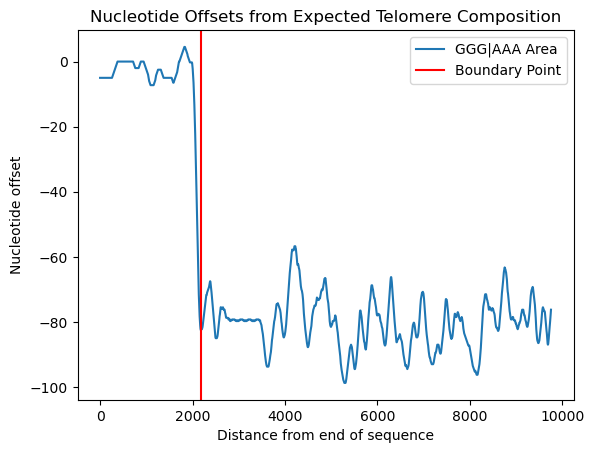

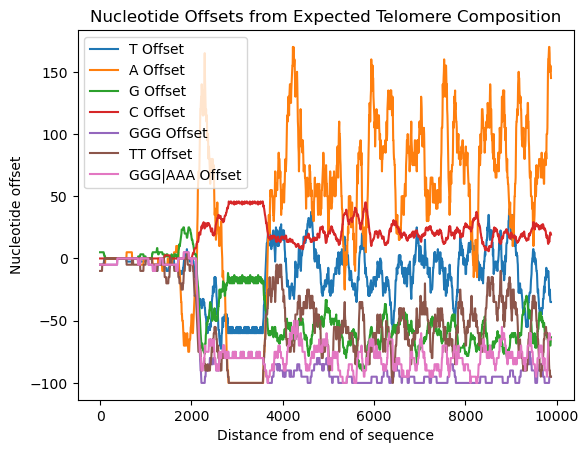

q returning  2178
q end: 2178
Error: chromosome not found in dictionary, returning 0
chr08q
graphAreaWindowSize: 20
2520
second show graph called


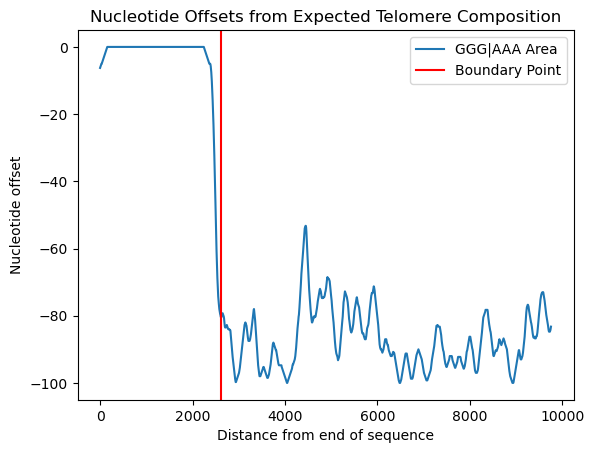

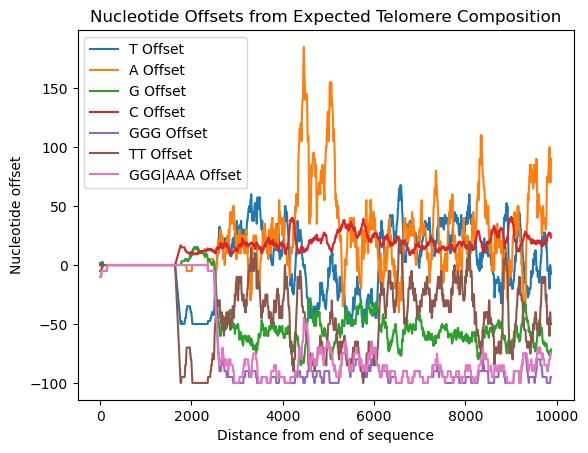

q returning  2616
q end: 2616
Error: chromosome not found in dictionary, returning 0
chr09q
graphAreaWindowSize: 20
2892
second show graph called


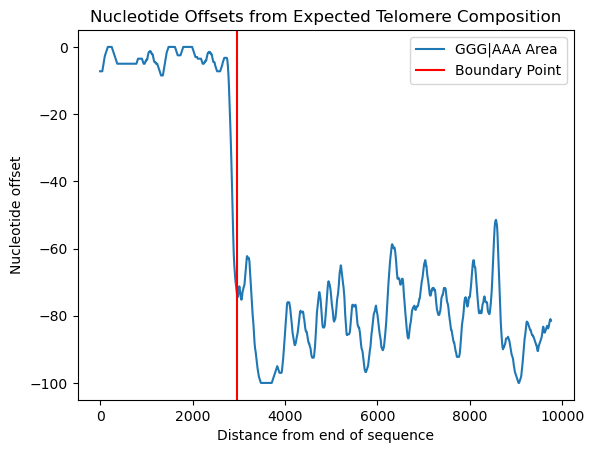

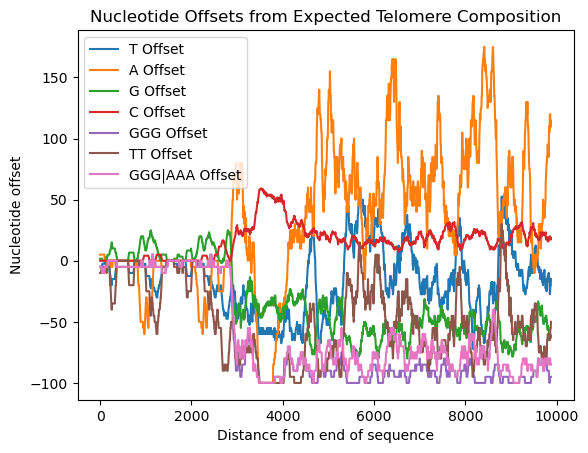

q returning  2970
q end: 2970
Error: chromosome not found in dictionary, returning 0
chr10q
graphAreaWindowSize: 20
3102
second show graph called


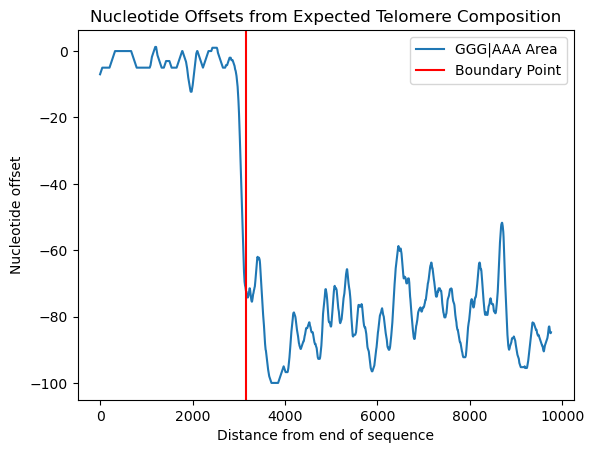

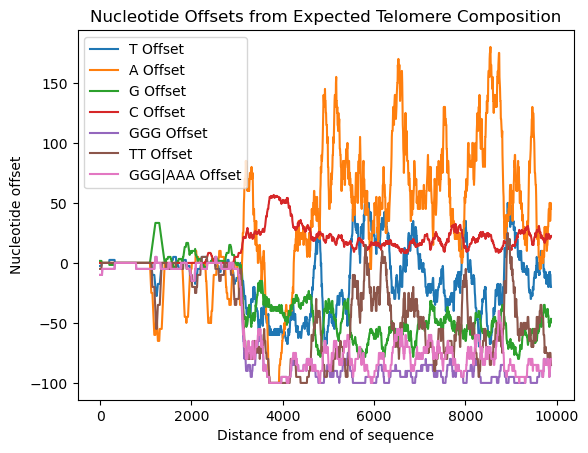

q returning  3162
q end: 3162
Error: chromosome not found in dictionary, returning 0
chr11q
graphAreaWindowSize: 20
2514
second show graph called


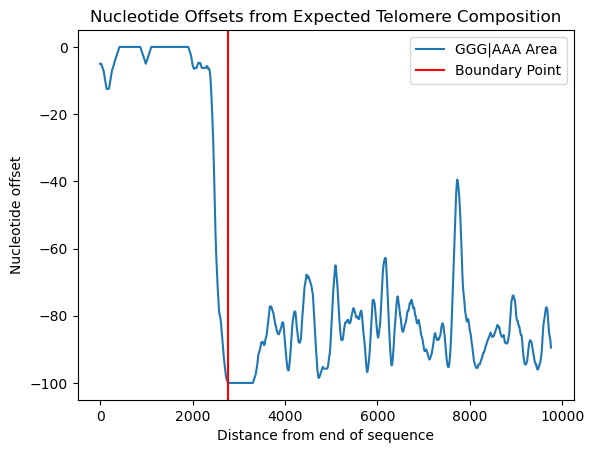

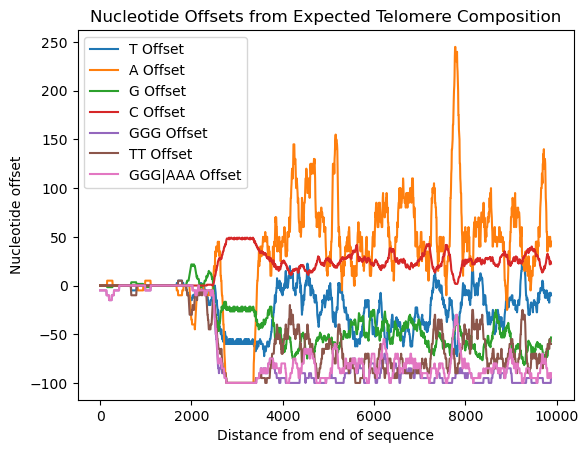

q returning  2766
q end: 2766
Error: chromosome not found in dictionary, returning 0
chr12q
graphAreaWindowSize: 20
2238
second show graph called


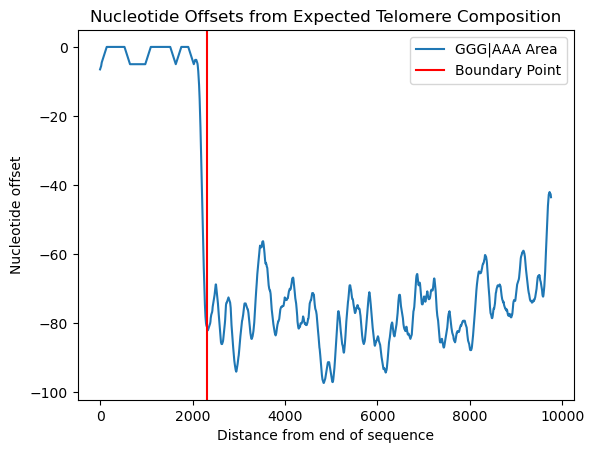

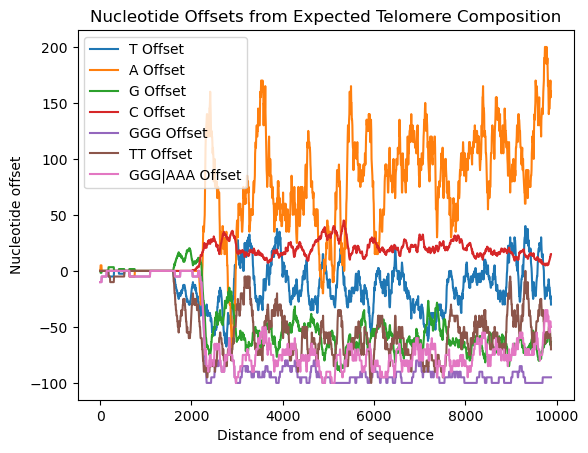

q returning  2304
q end: 2304
Error: chromosome not found in dictionary, returning 0
chr13q
graphAreaWindowSize: 20
3414
second show graph called


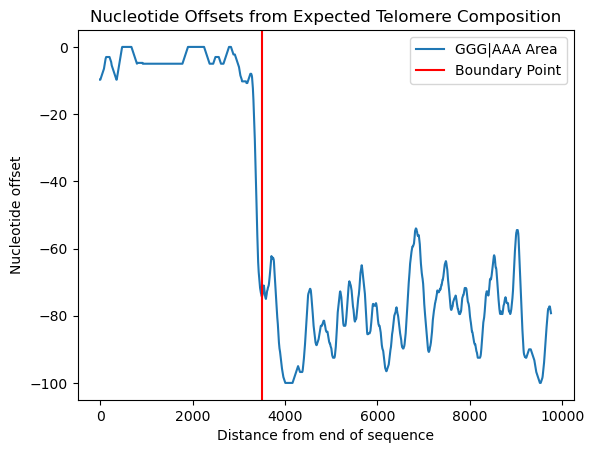

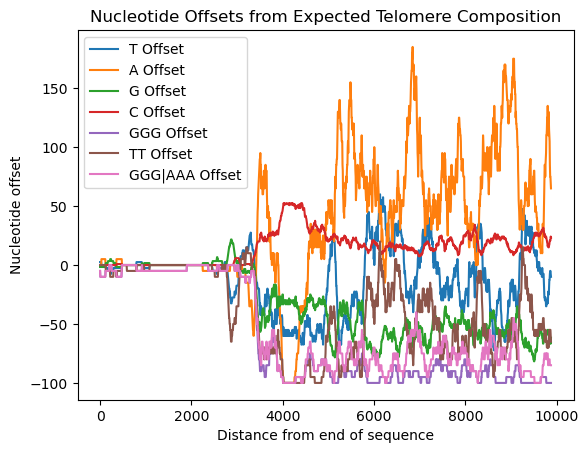

q returning  3498
q end: 3498
Error: chromosome not found in dictionary, returning 0
chr14q
graphAreaWindowSize: 20
1578
second show graph called


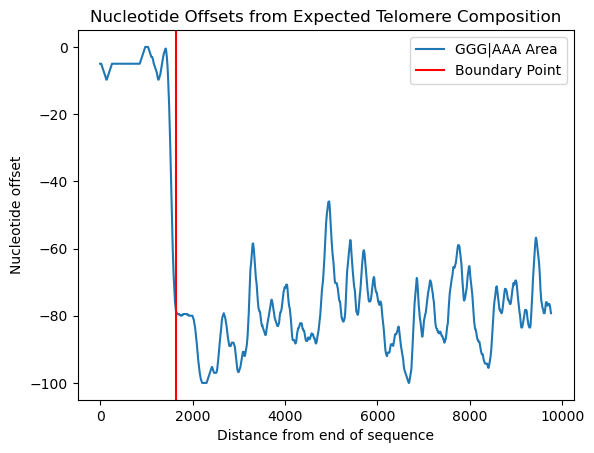

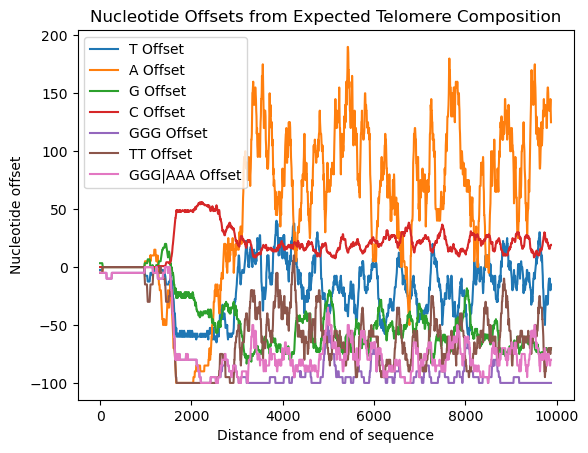

q returning  1650
q end: 1650
Error: chromosome not found in dictionary, returning 0
chr15q
graphAreaWindowSize: 20
2850
second show graph called


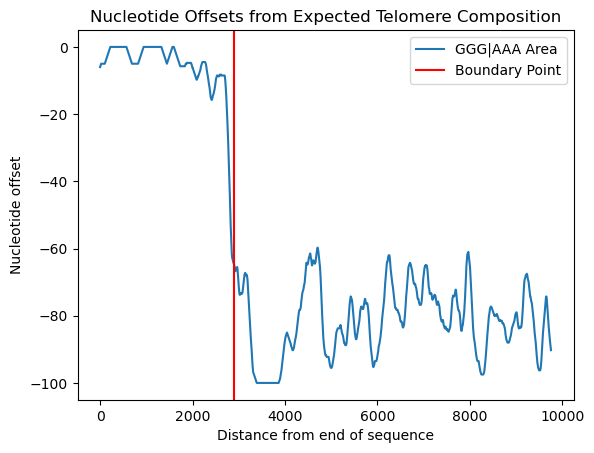

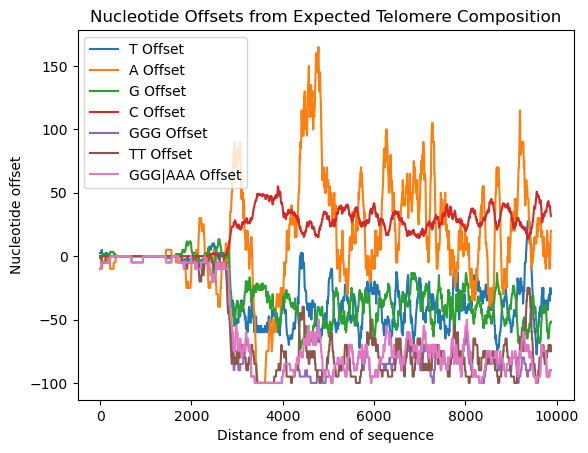

q returning  2892
q end: 2892
Error: chromosome not found in dictionary, returning 0
chr16q
graphAreaWindowSize: 20
2592
second show graph called


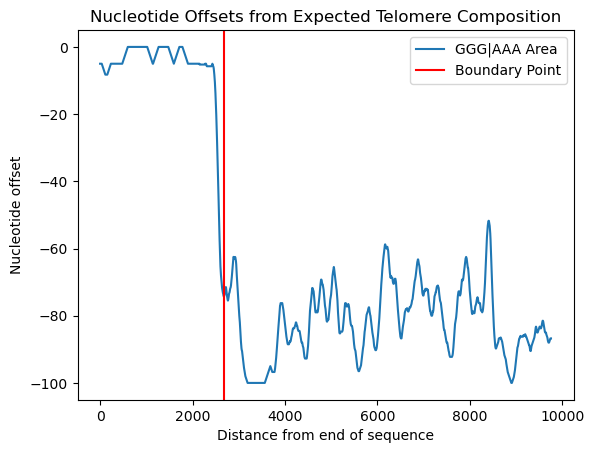

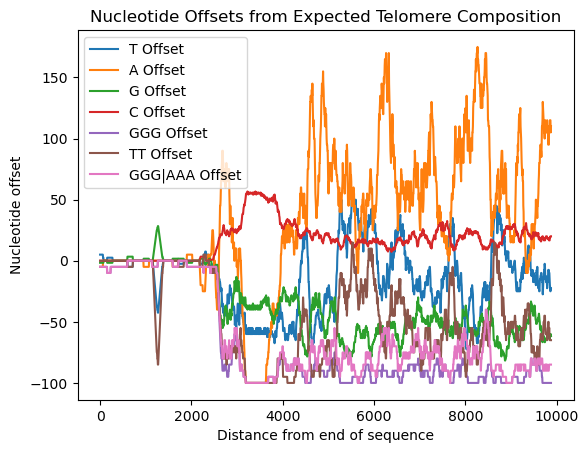

q returning  2676
q end: 2676
Error: chromosome not found in dictionary, returning 0
chr17q
graphAreaWindowSize: 20
2928
second show graph called


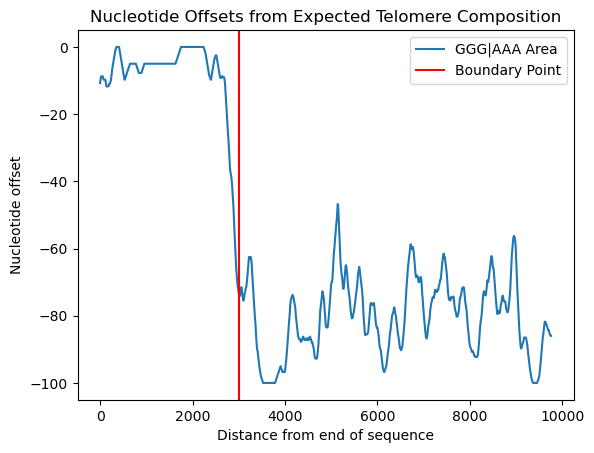

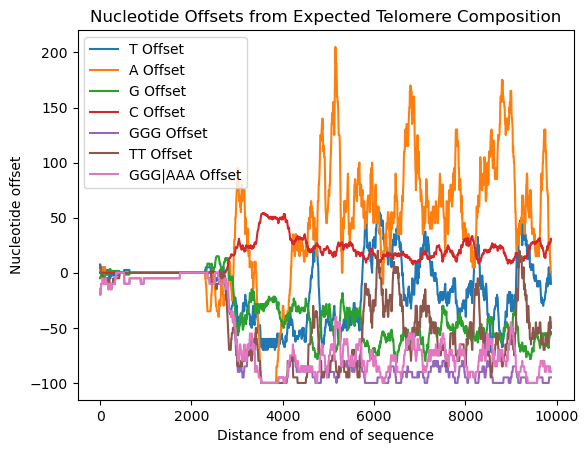

q returning  3012
q end: 3012
Error: chromosome not found in dictionary, returning 0
chr18q
graphAreaWindowSize: 20
7704
second show graph called


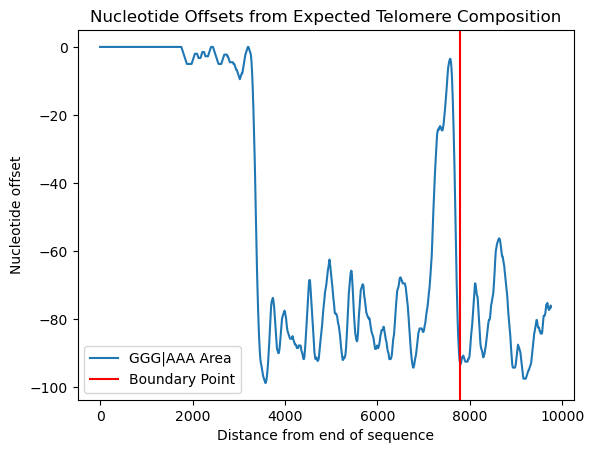

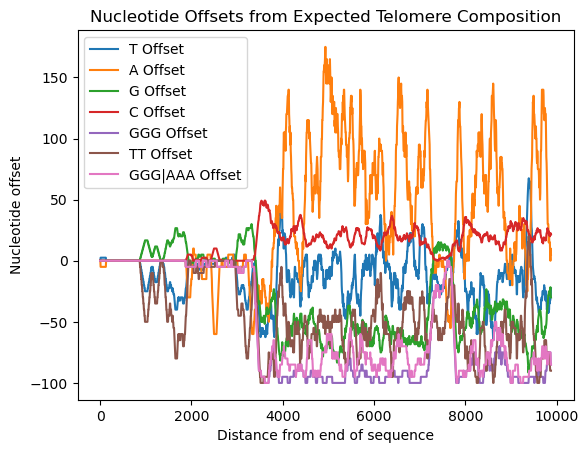

q returning  7794
q end: 7794
Error: chromosome not found in dictionary, returning 0
chr19q
graphAreaWindowSize: 20
2850
second show graph called


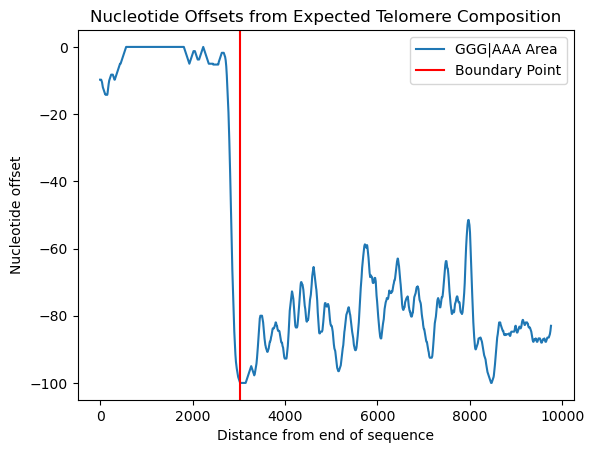

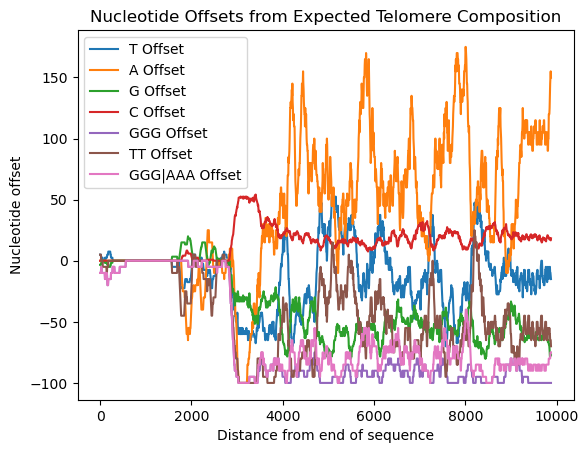

q returning  3030
q end: 3030
Error: chromosome not found in dictionary, returning 0
chr20q
graphAreaWindowSize: 20
3072
second show graph called


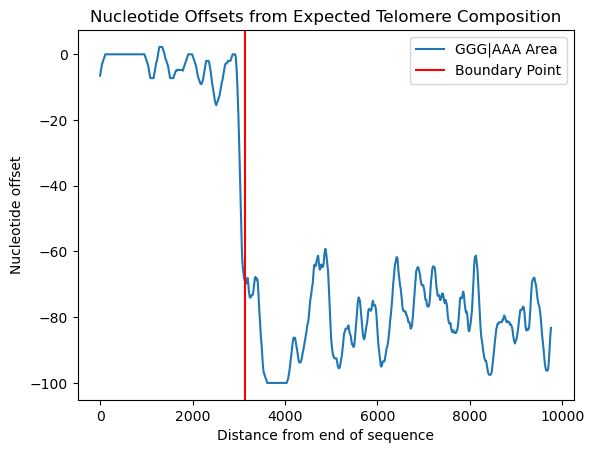

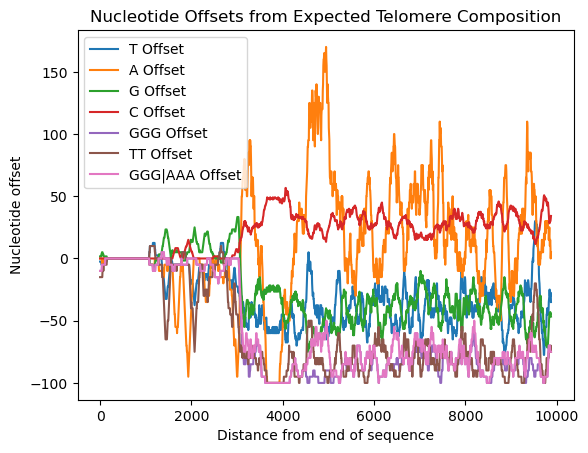

q returning  3132
q end: 3132
Error: chromosome not found in dictionary, returning 0
chr21q
graphAreaWindowSize: 20
4476
second show graph called


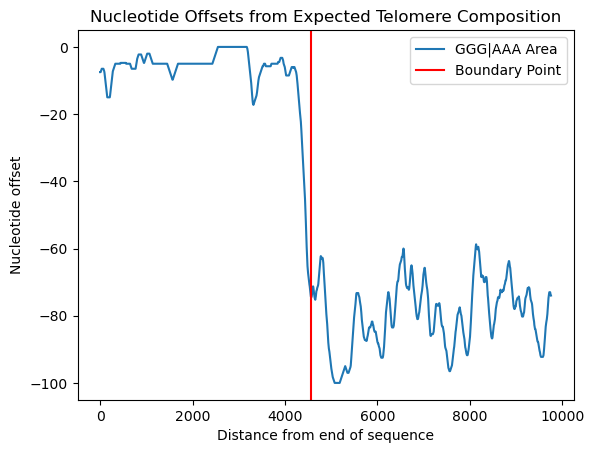

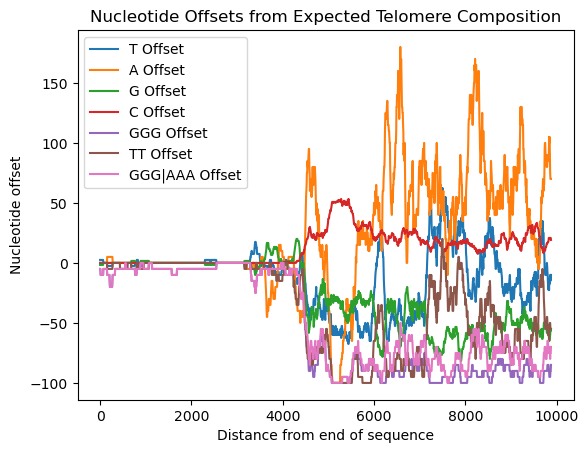

q returning  4566
q end: 4566
Error: chromosome not found in dictionary, returning 0
chr22q
graphAreaWindowSize: 20
2880
second show graph called


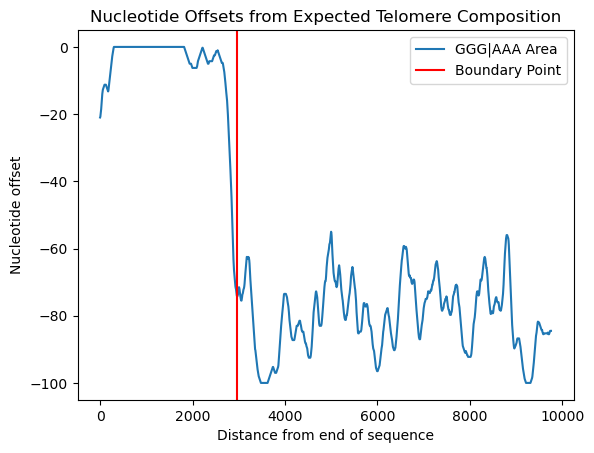

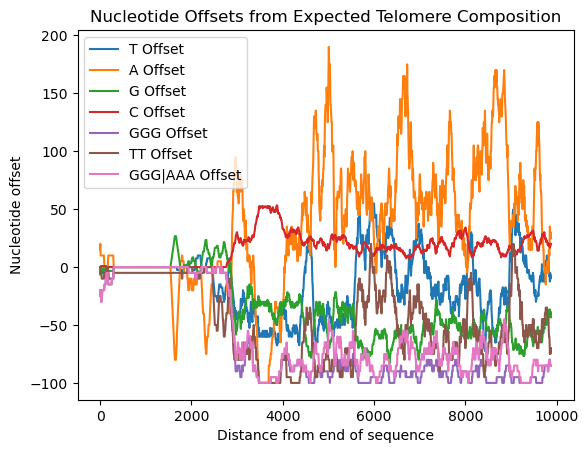

q returning  2964
q end: 2964
Error: chromosome not found in dictionary, returning 0
chrXq
graphAreaWindowSize: 20
2856
second show graph called


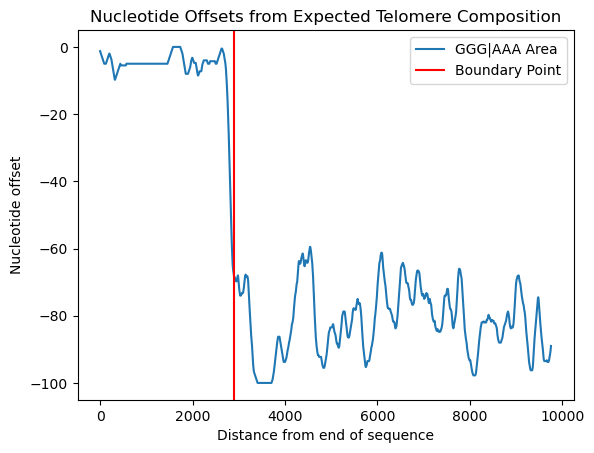

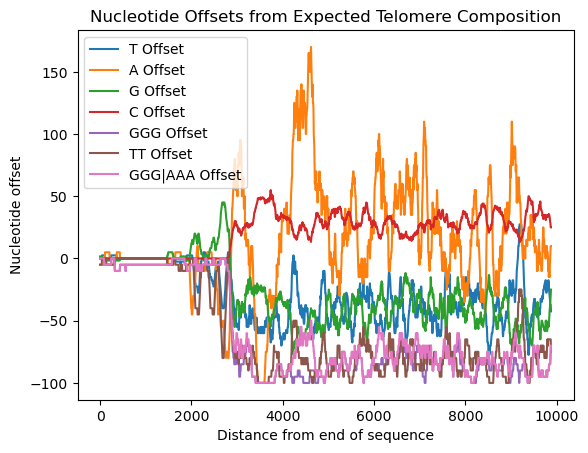

q returning  2904
q end: 2904
Error: chromosome not found in dictionary, returning 0
chrYq
graphAreaWindowSize: 20
6306
second show graph called


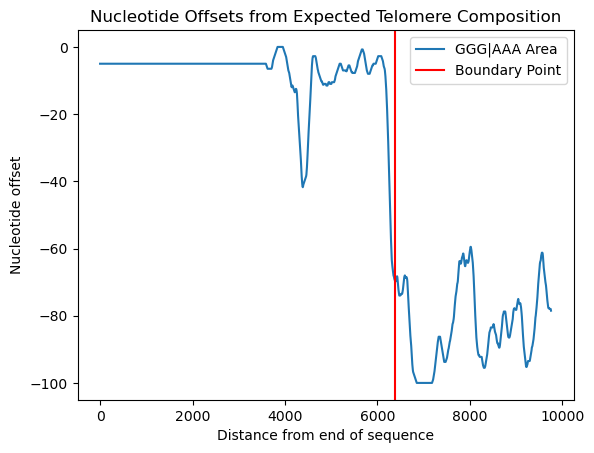

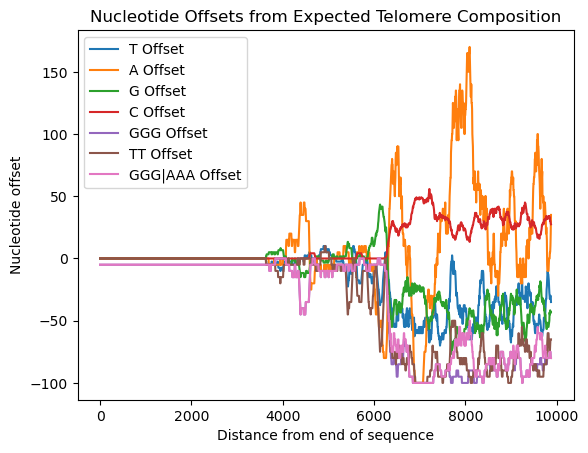

q returning  6384
q end: 6384
Error: chromosome not found in dictionary, returning 0
chr01p
c strand
graphAreaWindowSize: 20
2604
second show graph called


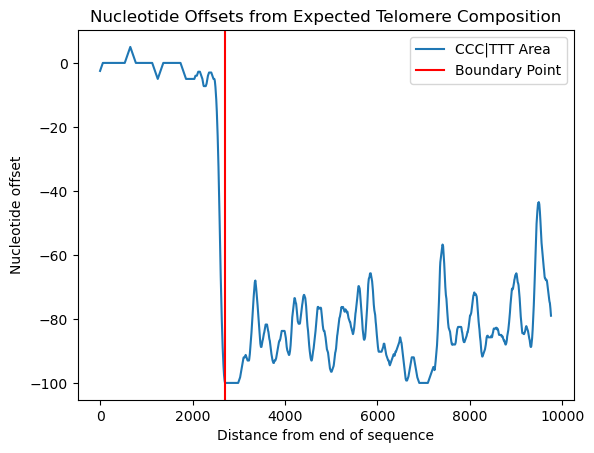

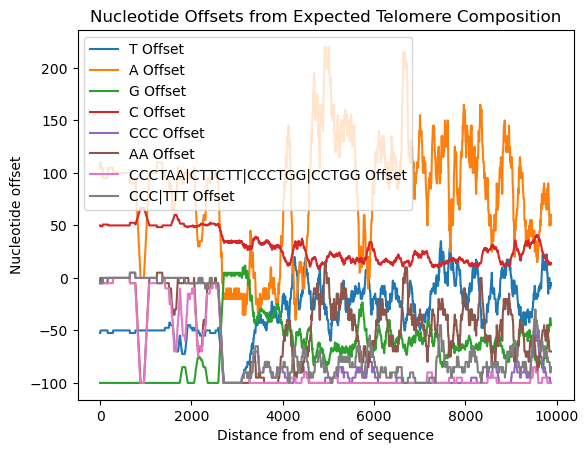

q returning  2706
p end: 2706
Error: chromosome not found in dictionary, returning 0
chr02p
c strand
graphAreaWindowSize: 20
3534
second show graph called


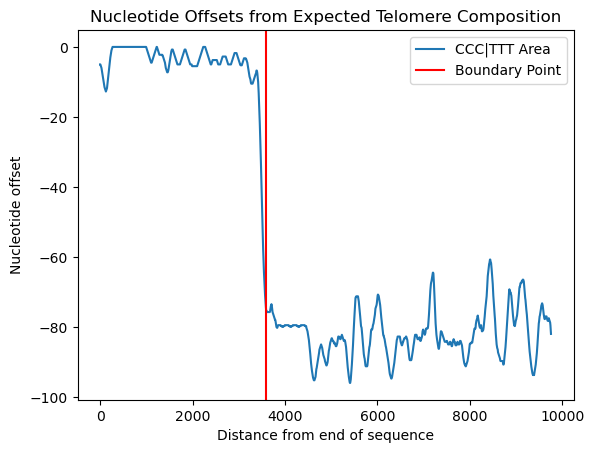

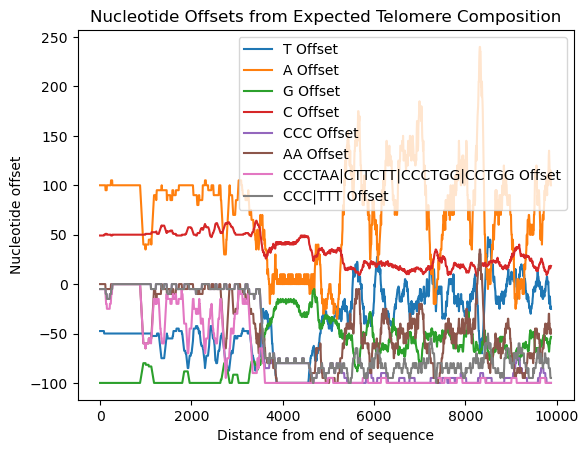

q returning  3600
p end: 3600
Error: chromosome not found in dictionary, returning 0
chr03p
c strand
graphAreaWindowSize: 20
2538
second show graph called


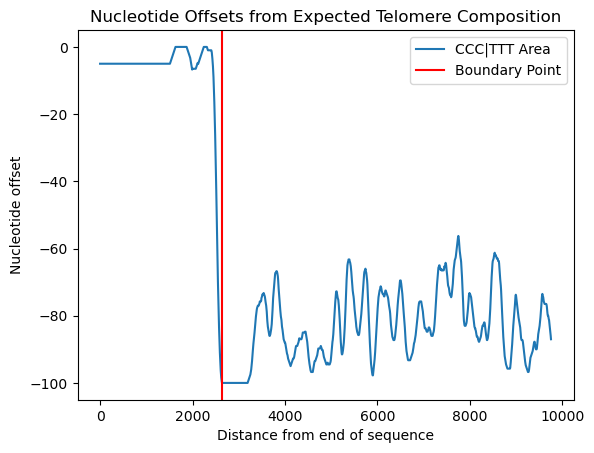

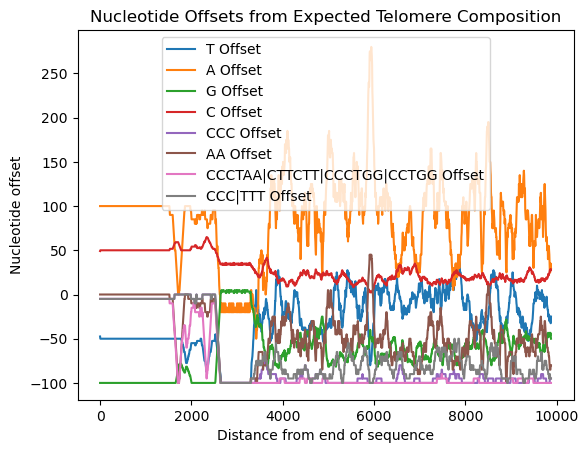

q returning  2640
p end: 2640
Error: chromosome not found in dictionary, returning 0
chr04p
c strand


KeyboardInterrupt: 

In [7]:


bed_data = []

filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)
    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:10000], isGStrand=False, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,maxAreaThreshold=-60, minAreaThreshold=-20, showGraphs=True)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
    else:
        distanceFromEnd = getTeloBoundary(record.seq[-10000:],isGStrand = True, teloWindow=120,nucleotideGraphAreaWindowSize=120, windowStep=6,maxAreaThreshold=-60, minAreaThreshold=-20, showGraphs=True)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        
    # break
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)